/home/ji/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


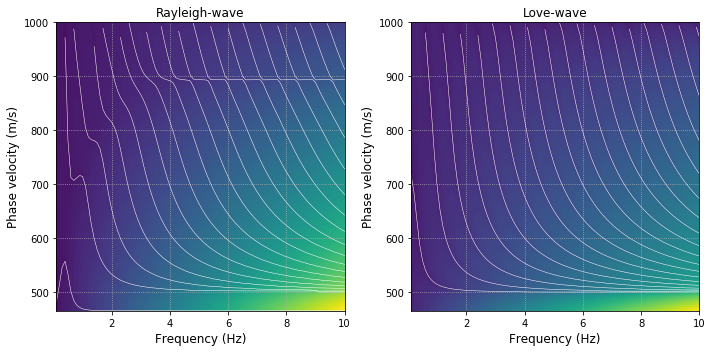

In [2]:
# -*- coding: utf-8 -*-

"""
Author: Keurfon Luu <keurfon.luu@mines-paristech.fr>
License: MIT
"""

import numpy as np
import matplotlib.pyplot as plt
try:
    from evodcinv import ThomsonHaskell
except ImportError:
    import sys
    sys.path.append("../")
    from evodcinv import ThomsonHaskell
    

if __name__ == "__main__":
    # Parameters
    vel = np.loadtxt("data/true_model.txt")
    modes = [ int(i) for i in np.arange(19) ]
    fmin, fmax, df = 0.1, 10., 0.1
    f = np.arange(fmin, fmax+df, df)
    ny = 200
    n_threads = 8
    
    # Initialize figure
    fig = plt.figure(figsize = (10, 5), facecolor = "white")
    fig.patch.set_alpha(0.)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    # Rayleigh-wave FC panel
    th = ThomsonHaskell(vel)
    th.propagate(f, ny = ny, domain = "fc", n_threads = n_threads)
    th.plot(axes = ax1)
    dcurves = th.pick(modes)
    for dcurve in dcurves:
        dcurve.plot(axes = ax1, plt_kws = dict(color = "white", linewidth = 0.5))
    ax1.set_title("Rayleigh-wave")
    
    # Love-wave FC panel
    th = ThomsonHaskell(vel, "love")
    th.propagate(f, ny = ny, domain = "fc", n_threads = n_threads)
    th.plot(axes = ax2)
    dcurves = th.pick(modes)
    for dcurve in dcurves:
        dcurve.plot(axes = ax2, plt_kws = dict(color = "white", linewidth = 0.5))
    ax2.set_title("Love-wave")

    fig.tight_layout()
    fig.show()
    fig.savefig('demo.png', bbox_inches='tight')